# Understanding unemployment in France 

Have you ever wondered where the numbers came from when politicians or the media talk about unemployment ? Being a subject of interest in Western countries, let's try to understand what is happening in terms of unemployment in France. For this, we have retrieved data from [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). 
They represent unemployment data in France in 2017.



## Description of the dataset 

Have a look at the description of the dataset [here](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Import useful libraries
  * pandas 
  * numpy
  * matplotlib 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data from fdeec17.csv

In [70]:
df = pd.read_csv("fdeec17.csv")
df

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428637,428637,2017,2,1,2,3,50,50,1,2,...,71.0,75.0,234080,27.451625,0.0,NaN,NaN,NaN,NaN,NaN
428638,428638,2017,3,1,2,3,50,60,1,2,...,33.0,75.0,234081,24.287870,NaN,NaN,NaN,NaN,NaN,NaN
428639,428639,2017,3,1,2,3,50,50,1,2,...,71.0,75.0,234081,24.287870,NaN,NaN,NaN,NaN,NaN,NaN
428640,428640,2017,4,1,2,3,50,60,1,2,...,33.0,75.0,234082,19.596248,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'ANNEE', 'TRIM', 'CATAU2010R', 'METRODOM', 'TYPMEN7',
       'AGE3', 'AGE5', 'COURED', 'ENFRED',
       ...
       'DIP11', 'CSTOTPRM', 'IDENTM', 'EXTRIAN', 'EMPNBH', 'HREC', 'HHCE',
       'HPLUSA', 'JOURTR', 'NBTOTE'],
      dtype='object', length=126)

In [7]:
df["ACTEU"].value_counts(dropna=False)

ACTEU
3.0    207520
1.0    198054
2.0     21864
NaN      1204
Name: count, dtype: int64

In [8]:
df["ACTEU"].unique()

array([ 1.,  3.,  2., nan])

In [9]:
df["ACTEU"] = df["ACTEU"].replace(3, "Inactif")
df["ACTEU"] = df["ACTEU"].replace(2, "Chômeur")
df["ACTEU"] = df["ACTEU"].replace(1, "Actif occupé")
df["ACTEU"]

0         Actif occupé
1         Actif occupé
2         Actif occupé
3         Actif occupé
4         Actif occupé
              ...     
428637         Inactif
428638         Inactif
428639         Inactif
428640         Inactif
428641         Inactif
Name: ACTEU, Length: 428642, dtype: object

In [10]:
data = df["ACTEU"].value_counts(dropna=False)
data

ACTEU
Inactif         207520
Actif occupé    198054
Chômeur          21864
NaN               1204
Name: count, dtype: int64

* By doing a [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), show the share of unemployed, inactive and employed persons in France (from the variable ACTEU). Make sure the following information is displayed : 

  * The percentage of each category 
  * A legend 

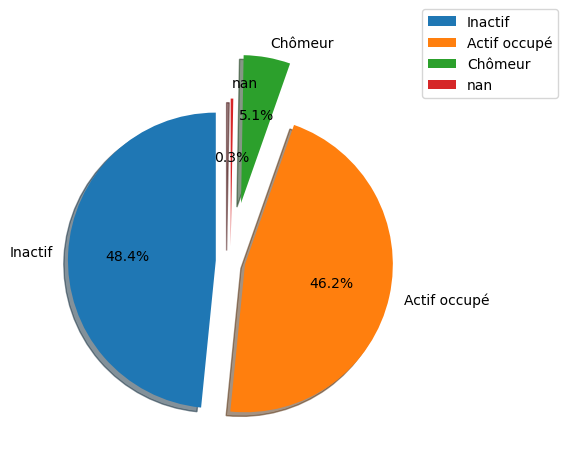

In [11]:
labels = data.index
values = data.values
explode = (0.1, 0.1, 0.4, 0.1)

plt.pie(data.values, labels=labels, explode=explode, startangle=90, shadow=True, autopct='%1.1f%%')
plt.legend(labels, bbox_to_anchor=(1, 1.2))
plt.show()


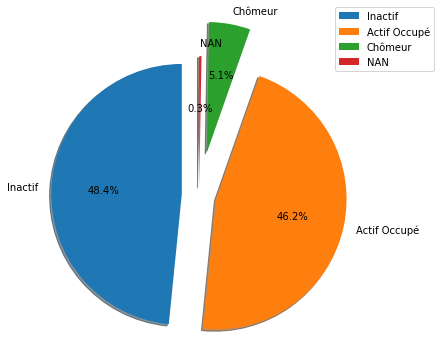

In [8]:
# Graphique attendu

---> The unemployment figure seems low and, if we look at the explanation of the *inactive*, it seems to include a lot of people (students, people not looking for work, etc.).

* Make the same graph on the variable ACTEU6 which is more precise on the type of actives.

In [12]:
data2 = df["ACTEU6"].value_counts(dropna=False)
data2

ACTEU6
1.0    198054
6.0    172921
5.0     34599
3.0     20854
NaN      1204
4.0      1010
Name: count, dtype: int64

In [13]:
df["ACTEU6"] = df["ACTEU6"].replace(1, "Actif occupé")
df["ACTEU6"] = df["ACTEU6"].replace(3, "Chômeur PSERE")
df["ACTEU6"] = df["ACTEU6"].replace(4, "Autre chômeur BIT")
df["ACTEU6"] = df["ACTEU6"].replace(5, "Etudiant, élève, stagiaire en formation")
df["ACTEU6"] = df["ACTEU6"].replace(6, "Autres inactifs (dont retraités)")

data2 = df["ACTEU6"].value_counts(dropna=False)
data2

ACTEU6
Actif occupé                               198054
Autres inactifs (dont retraités)           172921
Etudiant, élève, stagiaire en formation     34599
Chômeur PSERE                               20854
NaN                                          1204
Autre chômeur BIT                            1010
Name: count, dtype: int64

Index([                           'Actif occupé',
              'Autres inactifs (dont retraités)',
       'Etudiant, élève, stagiaire en formation',
                                 'Chômeur PSERE',
                                             nan,
                             'Autre chômeur BIT'],
      dtype='object', name='ACTEU6')


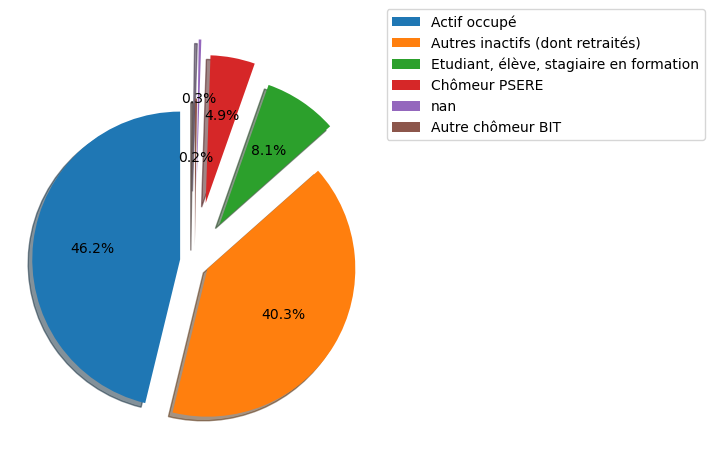

In [14]:
labels2 = data2.index
values2 = data2.values
explode = (0.1, 0.1, 0.3, 0.4, 0.5, 0.1)

print(labels2)
plt.pie(values2, explode=explode, startangle=90, shadow=True, autopct='%1.1f%%')
plt.legend(labels2, bbox_to_anchor=(1, 1.2))
plt.show()

* By ploting a [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), compare :

  * The ratio *chômeurs* / *Actifs occupés* 
  * The ratio *chômeurs* / *Actifs occupés + Inactifs*

In [15]:
data

ACTEU
Inactif         207520
Actif occupé    198054
Chômeur          21864
NaN               1204
Name: count, dtype: int64

In [16]:
ratio_chomeurs_actifs_occupes = data[2] / data[1]
ratio_chomeurs_actifs_occupes_inactifs = data[2] / (data[1] + data[0])
rapport_chomeurs = [ratio_chomeurs_actifs_occupes, ratio_chomeurs_actifs_occupes_inactifs]

print("Rapport de chômeurs")
print(rapport_chomeurs)

Rapport de chômeurs
[0.11039413493289708, 0.05390878113488537]


In [17]:
rapport_actifs = [1-round(ratio_chomeurs_actifs_occupes, 8), round(1-ratio_chomeurs_actifs_occupes_inactifs, 8)]

print("Rapport d'actifs'")
print(rapport_actifs)

Rapport d'actifs'
[0.88960587, 0.94609122]


In [18]:
groups = ["Chômeurs / Actifs occupés", "Chômeurs / Actifs + Inactifs"]
groups

['Chômeurs / Actifs occupés', 'Chômeurs / Actifs + Inactifs']

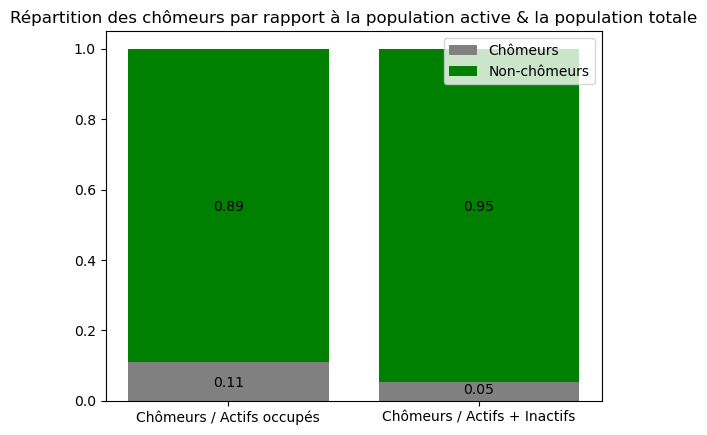

In [19]:
groups = ["Chômeurs / Actifs occupés", "Chômeurs / Actifs + Inactifs"]
legende = ["Chômeurs", "Non-chômeurs"]

plt.bar(x= groups, height=rapport_chomeurs, color='grey')
plt.bar(x=groups, height=rapport_actifs, color='g', bottom=rapport_chomeurs)
plt.text(groups[0], 0.55, 1-round(ratio_chomeurs_actifs_occupes, 2), ha = "center", va = "center")
plt.text(groups[0], 0.05, round(ratio_chomeurs_actifs_occupes, 2), ha = "center", va = "center")
plt.text(groups[1], 0.55, round(1-ratio_chomeurs_actifs_occupes_inactifs, 2), ha = "center", va = "center")
plt.text(groups[1], 0.03, round(ratio_chomeurs_actifs_occupes_inactifs, 2), ha = "center", va = "center")
plt.legend(legende)
plt.title("Répartition des chômeurs par rapport à la population active & la population totale")
plt.show()

It seems that we were 11% unemployed among the active (working) population in France in 2017 according to the ILO.

* By creating a [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) again, this time look at the distribution of unemployment seniority. The name of the variable is ANCCHOM

In [26]:
df["ANCCHOM"].value_counts(dropna=False)

ANCCHOM
NaN    406904
8.0      3906
4.0      3648
5.0      3398
2.0      3270
3.0      3193
7.0      2289
6.0      1132
1.0       902
Name: count, dtype: int64

In [27]:
df["ANCCHOM"] = df["ANCCHOM"].replace({
    8: "3 ans ou plus", 
    4: "De 6 mois à moins d'un an", 
    5: "De 1 an à moins d'un an et demi", 
    2: "De 1 mois à moins de 3 mois", 
    3: "De 3 mois à moins de 6 mois", 
    7: "De 2 ans à moins de 3 ans", 
    6: "De 1 an et demi à moins de 2 ans", 
    1: "Moins d'un mois"})

data3 = df["ANCCHOM"].value_counts()
data3


ANCCHOM
3 ans ou plus                       3906
De 6 mois à moins d'un an           3648
De 1 an à moins d'un an et demi     3398
De 1 mois à moins de 3 mois         3270
De 3 mois à moins de 6 mois         3193
De 2 ans à moins de 3 ans           2289
De 1 an et demi à moins de 2 ans    1132
Moins d'un mois                      902
Name: count, dtype: int64

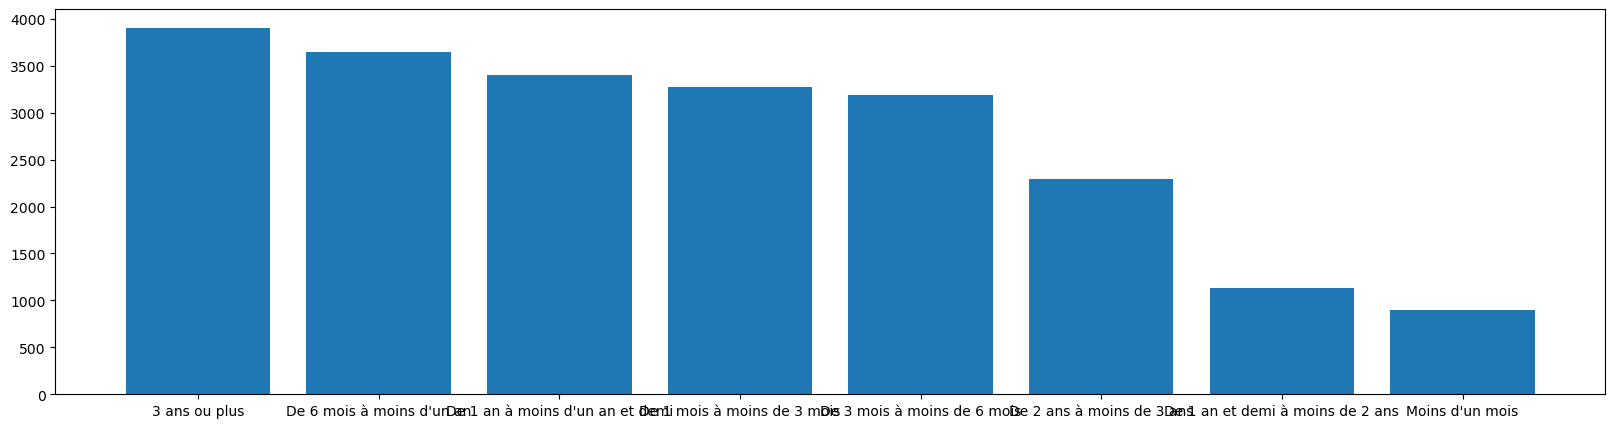

In [33]:
labels3 = data3.index
values3 = data3.values

plt.figure(figsize=(20, 5))
plt.bar(x = labels3, height=values3, label= labels3)
plt.text()
plt.show()

* The distribution doesn't look good on the bar chart, try doing it again on a piechart. 

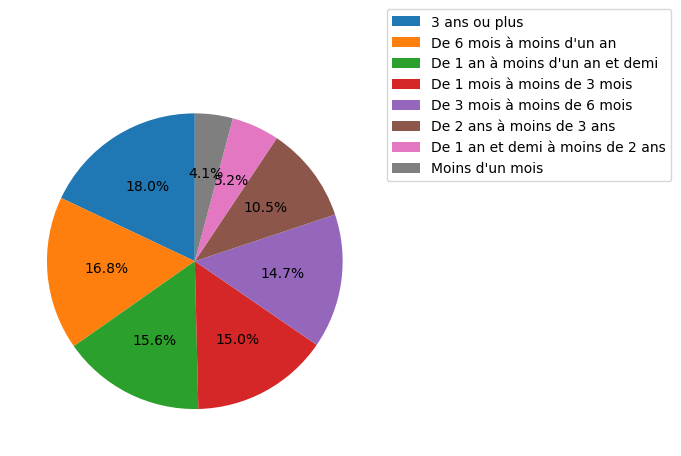

In [41]:
labels3 = data3.index
values3 = data3.values

plt.pie(values3, autopct='%1.1f%%', startangle=90)
plt.legend(labels3, bbox_to_anchor=(1, 1.2))
plt.show()

* It would be interesting to see the distribution of people registered with Pôle Emploi or an employment agency among these unemployed people. Look at this distribution thanks to the CONTACT column 
  * Directly remove the NaN from your chart

In [49]:
df["CONTACT"] = df["CONTACT"].replace({1: "Oui", 2: "Non"})
data4 = df["CONTACT"].value_counts()
data4

CONTACT
Non    15984
Oui    13144
Name: count, dtype: int64

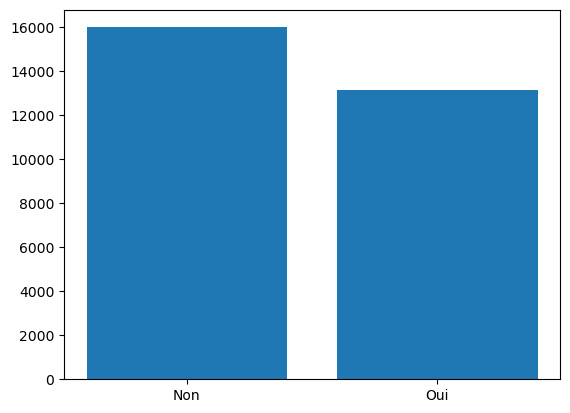

In [50]:
labels4 = data4.index
values4 = data4.values

plt.bar(x = labels4, height=values4, label= labels4)
plt.show()

* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français. 

In [52]:
df["CREACCP"].value_counts().sort_values()

CREACCP
9.0      216
10.0     354
8.0      598
13.0     894
5.0     1102
12.0    1223
11.0    1392
4.0     1404
1.0     1582
6.0     1820
3.0     2462
2.0     2779
7.0     6775
Name: count, dtype: int64

In [110]:
df["CREACCP"] = df["CREACCP"].replace({
    9: "Doit ou veut déménager", 
    10: "Veut s'installer à son compte ", 
    8: "Désire diminuer son temps de transport", 
    5: "Désire un travail avec un rythme horaire plus adapté ou plus modulable", 
    12: "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles", 
    11: "Veut changer de métier ou de secteur", 
    4: "Veut travailler plus d'heures", 
    1: "Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)",
    6: "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé", 
    3: "Veut un emploi plus stable (CDI)", 
    2: "Désire un emploi plus intéressant",
    7: "Désire augmenter ses revenus", 
    13: "NAN"
    })

df["CREACCP"] = df["CREACCP"].fillna("NAN")
data5 = df["CREACCP"].value_counts(dropna=False)
data5 = data5.sort_values()
data5

CREACCP
Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                             

In [125]:
sum_not_null = data5[:-1].sum()
sum_not_null

21707

In [122]:
liste = [round((x/sum_not_null)*100, 2) for x in data5[:-1]]
liste


[1.0, 1.63, 2.75, 5.08, 5.63, 6.41, 6.47, 7.29, 8.38, 11.34, 12.8, 31.21]

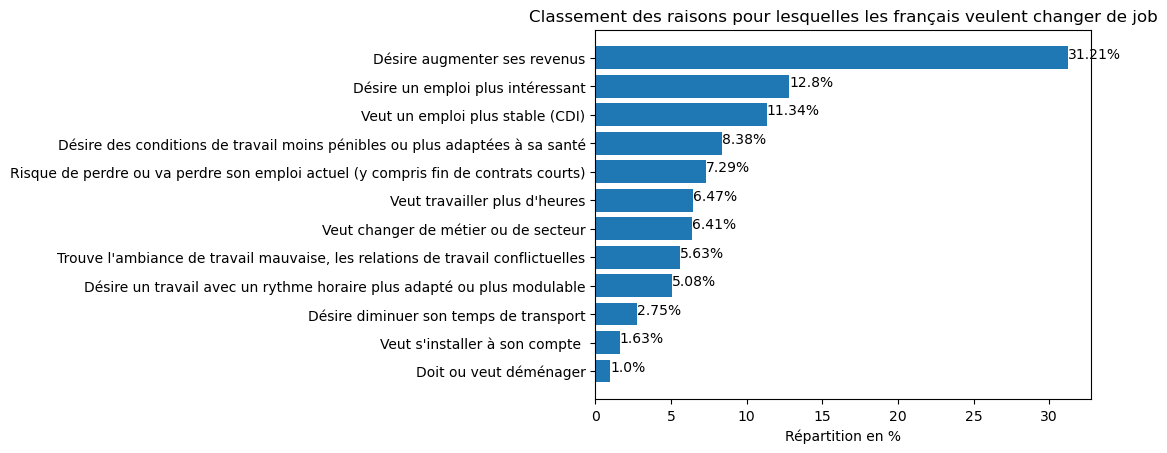

In [137]:
labels5 = data5[:-1].index
values5 = liste

plt.barh(y=labels5, width=values5)
plt.title("Classement des raisons pour lesquelles les français veulent changer de job")
plt.xlabel("Répartition en %")

for i in range(len(data5[:-1])):
    plt.text(x=liste[i], y=labels5[i], s="{}%".format(liste[i]))

plt.show()

* Let's end this exercise by looking at the distribution of desired hours for those looking for part-time work. To do this, use the HREC column. 

  * First try to simply create a histogram without the density function. 
  * To create the density function, you will need to use the following formula: 
      ```y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))```
     
     where *mu* is the mean of the distribution and *sigma* is the standard deviation.  You can help yourself with this tutorial [histogram with Density](https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html)

In [166]:
data6 = df["HREC"].value_counts(dropna=False).sort_values()
data6

HREC
70.0         1
46.0         1
75.0         1
54.0         1
9.0          1
0.0          2
1.0          2
36.0         2
41.0         2
31.0         2
49.0         2
38.0         2
34.0         2
60.0         3
80.0         3
37.0         3
29.0         4
11.0         4
13.0         5
42.0         5
48.0         5
55.0         5
19.0         6
23.0         6
3.0          7
99.0         7
2.0          9
39.0        12
14.0        14
7.0         14
4.0         18
50.0        20
27.0        22
45.0        22
21.0        23
6.0         27
5.0         27
16.0        28
22.0        29
8.0         31
32.0        32
12.0        33
40.0        43
26.0        50
18.0        79
17.0       100
28.0       119
24.0       124
35.0       154
10.0       155
15.0       254
30.0       323
25.0       556
20.0      1337
NaN     424903
Name: count, dtype: int64

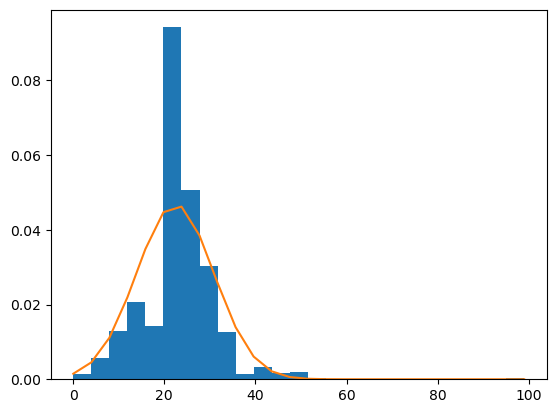

In [191]:
labels6 = data6.index
values6 = data6.values

sigma = 8.52
mu = 22.38
nb_bins = len(df["HREC"].value_counts())

fig, ax = plt.subplots()
n, bins, patches = plt.hist(df["HREC"], bins=25, density=True)

y2 = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y2)
plt.show()

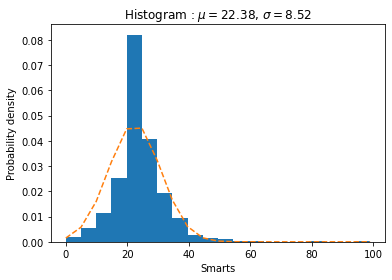